# Introduction to FermiLib
### Version 0.1 by Ryan Babbush, Jarrod McClean and Damian Steiger

## FermionTerm data structure for local fermionic operators

Fermionic systems are often treated in second quantization where arbitrary operators can be expressed using the fermionic creation and annihilation operators, $a^\dagger_k$ and $a_k$.  The fermionic ladder operators play a similar role to their qubit ladder operator counterparts, $\sigma^+_k$ and $\sigma^-_k$ but are distinguished by the cannonical fermionic anticommutation relations, $\{a^\dagger_i, a^\dagger_j\} = \{a_i, a_j\} = 0$ and $\{a_i, a_j^\dagger\} = \delta_{ij}$, also known as the Pauli exclusion principle. A "local fermionic operator" is defined here as a product of fermionic creation and annihilation operators with an associated (complex) scalar coefficient. For instance, $-1.7 \, a^\dagger_3 a_1$, $(1 + 2i) \, a^\dagger_4 a^\dagger_3 a_9 a_1$ and $0.8\, a_3 a_{11}$ are all perfectly valid examples of local fermionic operators.

Representation of these operators using the FermionTerm data structure is at the very heart of FermiLib. The FermionTerm class is part of the fermion_operators.py module. Because FermionTerms share the same basic structure as QubitTerms (which we introduce later on in this demo), both classes inherit most of their functionality from the LocalTerm parent class which is found in the module local_terms.py. FermionTerm objects store three important attributes: the number of sites on which the term acts (n_qubits), the scalar coefficient of the term (coefficient) and a python list which specifies the operators in the term (terms). The terms list is a list of 2-tuples which represent the $a^\dagger_k$ / $a_k$ ladder operators with the first element is an int giving the site on which the term acts and the second element is Boole indicating whether the operator is $a^\dagger$ (1), or $a$ (0). For instance, $[(3, 1), (7, 0)]$ represents $a_3^\dagger a_7$. Note that the "terms" attribute associated with the identity operator is an empty list.

In the cell below, we import FermionTerm and initialize a few example terms. We show that terms can be manipulated in an intuitive way using python operators such as $*=$, $==$, $!=$, len, abs. The slice, get, set and iteration methods are redirected to the .terms attribute; for instance, FermionTerm[2] returns the third element of the .terms attribute. The print and repr methods are overloaded to show a convenient human-readable representation. The methods .hermitian_conjugate() (an in-place method) and .hermitian_conjugated() (returns a copy) act on the term $T$ to return $T^\dagger$. Note that this convention of methods that end in "ed" returning copies whereas methods without "ed" being in-place occurs throughout the library. We also show a quick way to initialize identity operators and number operators. See the code documentation for further details.

In [1]:
from fermion_operators import FermionTerm, fermion_identity

n_qubits = 8
example_term = FermionTerm(n_qubits, -3.17, [(3, 1), (7, 0)])
identity_fermion = fermion_identity(n_qubits)
print('Our example term is: {}'.format(example_term))
print('Below are some manipulations of that term.')
print 2. * example_term
print abs(example_term)
print len(example_term)
print example_term[1]
example_term[1] = (2, 0)
example_term *= 5.j
print example_term
print example_term.hermitian_conjugated()
print example_term.is_molecular_term()

print('\nOur identity term is represented as: {}').format(
    identity_fermion)
identity_fermion *= 3.
print('Is the identity term equal to the other term? FermiLib says: {}'.format(
    identity_fermion == example_term))
print('Are they not equal? FermiLib says: {}'.format(
     identity_fermion != example_term))

print('\nBelow we loop through the ladder operators.')
for ladder_operator in example_term:
    print ('{} is a ladder operator in the example term.'.format(
        ladder_operator))

Our example term is: -3.17 [3+ 7]
Below are some manipulations of that term.
-6.34 [3+ 7]
3.17 [3+ 7]
2
(7, 0)
(-0-15.85j) [3+ 2]
(-0+15.85j) [2+ 3]
False

Our identity term is represented as: 1.0 []
Is the identity term equal to the other term? FermiLib says: False
Are they not equal? FermiLib says: True

Below we loop through the ladder operators.
(3, 1) is a ladder operator in the example term.
(2, 0) is a ladder operator in the example term.


## FermionOperator data structure for arbitrary fermion operators

The FermionOperator data structure represents arbitrary sums of FermionTerm objects. For instance, the sum $-1.7 \, a^\dagger_3 a_1 + (1 + 2i) \, a^\dagger_4 a^\dagger_3 a_9 a_1 + 0.8\, a_3 a_{11}$ would be an example of a FermionOperator. Like FermionTerm, FermionOperator inherits from a more general parent class which it shares with QubitOperator, LocalOperator, which is found in the module local_operator.py. The FermionOperator data structure is implemented as a wrapper to a python dictionary. Internally, the keys for this dictionary are the .terms attribute of a the FermionTerm object and the values are the .coefficient attribute. 

To initialize a FermionOperator one should pass n_qubits, followed by a list of FermionTerms. Alternatively, a sum or difference of FermionTerms automatically returns a FermionOperator. The FermionOperator supports many built-in operands from the python data model such as $+$, $-$, $+=$, $-=$, $*$, $**$, $==$, $!=$, abs, print, iter (aka "in"), len, and del. FermionOperator is implement as a dictionary is so that terms can be quickly added to the class. Note that one can set or look up the coefficient of a term in a FermionOperator by passing an instance of FermionTerm to the slice operator [] of FermionOperator.

In [2]:
from fermion_operators import FermionOperator, FermionTerm, number_operator
n_qubits = 8
example_term_a = FermionTerm(
    n_qubits, -3.17, [(3, 1), (7, 0), (6, 1), (7, 1)])
example_term_b = FermionTerm(
    n_qubits, -88.j, [(1, 1), (2, 0)])
example_term_c = FermionTerm(
    n_qubits, 2., [(6, 1), (3, 0)])
fermion_number = number_operator(n_qubits)

example_operator = FermionOperator(
    n_qubits, [example_term_a, example_term_b])
alternative_operator = example_term_a + example_term_b
print('Our example FermionOperators are:\n{}'.format(
    example_operator))
print('We could also have made this operator by just summing together the terms.\n' +
      'Does FermiLib agree that these methods of initialization are equivalent?\n' +
      str(alternative_operator == example_operator))

print('\nBelow is a number operator:\n{}'.format(fermion_number))

print('Demonstration 1.')
alternative_operator *= -1.
print(alternative_operator)

print('Demonstration 2.')
alternative_operator -= 2. * example_term_c
print(alternative_operator)

print('Demonstration 3.')
squared_operator = example_operator ** 2
print(squared_operator)

print('Demonstration 4.')
print(example_operator[example_term_b])
example_operator[example_term_b] += 1.
print(example_operator[example_term_b])

print('\nDemonstration 5.')
for term in example_operator:
    print('Now looping over term {}.'.format(term))
print(example_term_a in example_operator)
print(example_term_c in example_operator)

print('\nDemonstration 6.')
del example_operator[example_term_a]
print example_operator

Our example FermionOperators are:
-88j [1+ 2]
-3.17 [3+ 7 6+ 7+]

We could also have made this operator by just summing together the terms.
Does FermiLib agree that these methods of initialization are equivalent?
True

Below is a number operator:
1.0 [4+ 4]
1.0 [3+ 3]
1.0 [1+ 1]
1.0 [6+ 6]
1.0 [2+ 2]
1.0 [7+ 7]
1.0 [0+ 0]
1.0 [5+ 5]

Demonstration 1.
88j [1+ 2]
(3.17-0j) [3+ 7 6+ 7+]

Demonstration 2.
88j [1+ 2]
-4.0 [6+ 3]
(3.17-0j) [3+ 7 6+ 7+]

Demonstration 3.
278.96j [3+ 7 6+ 7+ 1+ 2]
10.0489 [3+ 7 6+ 7+ 3+ 7 6+ 7+]
(-7744+0j) [1+ 2 1+ 2]
278.96j [1+ 2 3+ 7 6+ 7+]

Demonstration 4.
-88j
(1-88j)

Demonstration 5.
Now looping over term (1-88j) [1+ 2].
Now looping over term -3.17 [3+ 7 6+ 7+].
True
False

Demonstration 6.
(1-88j) [1+ 2]



## Normal-ordering and commutators
Below, we show off routines for normal-ordering both FermionTerms and FermionOperators as well as routines to check commutators. Note that the normal-ordering method on FermionTerm automatically returns a FermionOperator, not a FermionTerm, as in general the normal-ordered form of a FermionTerm is a sum of FermionTerms. Note that unless normal-ordering is strictly required for a complex routine, FermiLib is designed to never normal-order automatically. This is because normal-ordering is foramlly an exponentially expensive routine. So we want users to manually call normal-ordering so they know that it is occuring.

In [3]:
from fermion_operators import FermionOperator, FermionTerm
n_qubits = 8
example_term_a = FermionTerm(
    n_qubits, -3.17, [(3, 1), (7, 0), (6, 1), (7, 1)])
example_term_b = FermionTerm(
    n_qubits, -88.j, [(1, 1), (2, 0)])
example_term_c = FermionTerm(
    n_qubits, 2., [(6, 1), (3, 0)])
example_operator = FermionOperator(
    n_qubits, [example_term_a, example_term_b])

print('After normal-ordering, term {} becomes operator\n{}'.format(
    example_term_a, example_term_a.normal_ordered()))

print('We can also normal-order operators. For instance, operator\n{}becomes operator\n{}'.format(
    example_operator, example_operator.normal_ordered()))

print('Does term {} commute with itself? FermiLib computes its commutator as {}.\n'.format(
    example_term_b, example_term_b.commutator(example_term_b)))

commutator = example_term_a.commutator(example_term_a.normal_ordered())
print('Does term {} commute with the following operator?\n{}FermiLib computes its commutator as:\n{}'.format(
    example_term_a, example_term_a.normal_ordered(), commutator))
print('But be careful! If we normal-order this commutator, we find it evaluates to {}.'.format(
    commutator.normal_ordered()))

After normal-ordering, term -3.17 [3+ 7 6+ 7+] becomes operator
(3.17+0j) [7+ 6+ 3+ 7]
(-3.17+0j) [6+ 3+]

We can also normal-order operators. For instance, operator
-88j [1+ 2]
-3.17 [3+ 7 6+ 7+]
becomes operator
-88j [1+ 2]
(3.17+0j) [7+ 6+ 3+ 7]
(-3.17+0j) [6+ 3+]

Does term -88j [1+ 2] commute with itself? FermiLib computes its commutator as 0.

Does term -3.17 [3+ 7 6+ 7+] commute with the following operator?
(3.17+0j) [7+ 6+ 3+ 7]
(-3.17+0j) [6+ 3+]
FermiLib computes its commutator as:
(10.0489+0j) [3+ 7 6+ 7+ 6+ 3+]
(-10.0489+0j) [6+ 3+ 3+ 7 6+ 7+]
(10.0489+0j) [7+ 6+ 3+ 7 3+ 7 6+ 7+]
(-10.0489+0j) [3+ 7 6+ 7+ 7+ 6+ 3+ 7]

But be careful! If we normal-order this commutator, we find it evaluates to 0.


## Lattice models

FermiLib also supports generating various lattice models of fermions such as the Hubbard model (and others that will be added once papers are out). Below is a very simple example showing code to generate a Hubbard model.

In [4]:
from hubbard import fermi_hubbard
x_dimension = 3
y_dimension = 2
tunneling = 2.
coulomb = 1.
magnetic_field = 0.5
chemical_potential = 0.25
periodic = 1
spinless = 0
hubbard_model = fermi_hubbard(
    x_dimension, y_dimension, tunneling, coulomb, chemical_potential, magnetic_field, periodic, spinless)
print(hubbard_model)

1.0 [10+ 10 11+ 11]
-2.0 [0+ 6]
-0.75 [10+ 10]
-4.0 [10+ 8]
-2.0 [11+ 5]
1.0 [8+ 8 9+ 9]
-2.0 [8+ 2]
-4.0 [5+ 3]
0.25 [1+ 1]
-2.0 [1+ 7]
-2.0 [9+ 3]
-0.75 [2+ 2]
-4.0 [2+ 4]
-4.0 [9+ 11]
1.0 [4+ 4 5+ 5]
0.25 [5+ 5]
0.25 [11+ 11]
1.0 [0+ 0 1+ 1]
-2.0 [2+ 0]
-0.75 [0+ 0]
-2.0 [6+ 0]
-2.0 [7+ 9]
-4.0 [8+ 10]
-2.0 [5+ 11]
-2.0 [1+ 3]
0.25 [3+ 3]
-2.0 [3+ 9]
1.0 [2+ 2 3+ 3]
-2.0 [9+ 7]
-2.0 [8+ 6]
0.25 [7+ 7]
-4.0 [11+ 9]
-2.0 [6+ 8]
-2.0 [10+ 4]
-2.0 [2+ 8]
-0.75 [4+ 4]
-4.0 [4+ 2]
-2.0 [7+ 1]
-2.0 [4+ 10]
-0.75 [6+ 6]
-4.0 [3+ 5]
-2.0 [0+ 2]
-2.0 [3+ 1]
1.0 [6+ 6 7+ 7]
0.25 [9+ 9]
-0.75 [8+ 8]



## QubitOperators and QubitTerms data structures

Also core to FermiLib's functionality is the representation of local qubit Hamiltonians. The QubitTerm and QubitOperator data structures share much in common with FermionTerm and FermionOperator data structures, which is why they inherit from the same parent classes in local_terms.py and local_operators.py.

An example of a QubitTerm is the local Hamiltonian $0.8 \, X_1 Y_7 Z_{12}$ where $X_1$, $Y_7$, and $Z_{12}$ are Pauli operators acting on tensor factors 1, 7 and 12. A key difference between FermionTerm and QubitTerm is that the .terms attribute of QubitTerm differs from the .terms attribute of FermionTerm. Specifically, where 0 and 1 encode $a^\dagger$ and $a$ operators in FermionTerm, $X$, $Y$ and $Z$ Pauli operators are encoded by those strings. For instance, for the term mentioned above, the .terms attribute would be [(1, 'X'), (7, 'Y'), (12, 'Z')]. Note that while the .terms attribute of FermionTerm is not necessarily sorted by orbital index, the .term attribute of QubitTerm is always sorted by tensor factor. This allows for asymptotically faster term multiplication.

An example of QubitOperator is a sum of local Hamiltonians; e.g., $0.8 \, X_1 Y_7 Z_{12} + 3.17 \, Z_2 Z_3$. In pretty much all regards, the QubitOperator class supports the same operations and access of the FermionOperator class. Note that the identity term is again represented by an empty terms list and an empty QubitOperator terms list corresponds to the zero operator. We demonstrate some of these functionalities below.

In [5]:
from qubit_operators import QubitTerm, QubitOperator, qubit_identity

n_qubits = 8
example_term_a = QubitTerm(
    n_qubits, 0.3, [(1, 'Y'), (4, 'X'), (2, 'X'), (6, 'Z')])
example_term_b = QubitTerm(
    n_qubits, 17, [(0, 'X'), (3, 'X')])
example_term_c = 8.9 * qubit_identity(n_qubits)
example_operator = example_term_a - example_term_b
alternative_operator = example_term_a + example_term_c
print('The example operators is:\n{}'.format(example_operator))

print('Below are some examples of manipulating it.')
print(len(example_operator))
print(example_operator[example_term_c])
print(example_operator == alternative_operator)
example_operator *= alternative_operator
print(example_operator)


The example operators is:
-17.0 X0 X3
0.3 Y1 X2 X4 Z6

Below are some examples of manipulating it.
2
0.0
False
-151.3 X0 X3
0.09 I
-5.1 X0 Y1 X2 X3 X4 Z6
2.67 Y1 X2 X4 Z6



## The Jordan-Wigner transformation

One can easily map back and forth between FermionTerms/Operators and QubitTerms/Operators using .jordan_wigner_transform(), which acts on fermions, and .reverse_jordan_wigner(), which acts on qubits. Note that like all methods that output an instance of a different class type, these are not in-place methods. We are working with James Whitfield and Vojtech Havlicek to incorporate Bravyi-Kitaev transforms and other, more general methods.

In [6]:
from fermion_operators import FermionOperator, FermionTerm
n_qubits = 8
example_term = FermionTerm(n_qubits, -3.17, [(3, 1), (7, 0), (6, 1), (7, 1)])

print('The example terms is\n{}\nwhich becomes \n{}under the Jordan-Wigner transform.\n'.format(
    example_term, example_term.jordan_wigner_transform()))

print('We can also reverse transform qubit operators. This has many uses.\n')
for qubit_term in example_term.jordan_wigner_transform():
    reversed_term = qubit_term.reverse_jordan_wigner()
    reversed_term.normal_order()
    print('The reverse Jordan-Wigner transform of {} is:{}'.format(
        qubit_term, reversed_term))

The example terms is
-3.17 [3+ 7 6+ 7+]
which becomes 
-0.39625j X3 Z4 Z5 Y6 Z7
(0.39625+0j) X3 Z4 Z5 X6 Z7
(-0.39625+0j) Y3 Z4 Z5 Y6
-0.39625j Y3 Z4 Z5 X6
(0.39625+0j) X3 Z4 Z5 X6
-0.39625j X3 Z4 Z5 Y6
-0.39625j Y3 Z4 Z5 X6 Z7
(-0.39625+0j) Y3 Z4 Z5 Y6 Z7
under the Jordan-Wigner transform.

We can also reverse transform qubit operators. This has many uses.

The reverse Jordan-Wigner transform of -0.39625j X3 Z4 Z5 Y6 Z7 is:(0.39625+0j) [6+ 3]
(-0.39625+0j) [6+ 3+]
(0.7925+0j) [7+ 7 6 3]
(0.7925+0j) [7+ 6+ 3+ 7]
(0.7925+0j) [7+ 6+ 7 3]
(-0.39625+0j) [6 3]
(-0.7925+0j) [7+ 3+ 7 6]
(-0.39625+0j) [3+ 6]

The reverse Jordan-Wigner transform of (0.39625+0j) X3 Z4 Z5 X6 Z7 is:(0.39625+0j) [6+ 3]
(-0.39625+0j) [6+ 3+]
(-0.7925+0j) [7+ 7 6 3]
(0.7925+0j) [7+ 6+ 3+ 7]
(0.7925+0j) [7+ 6+ 7 3]
(0.39625+0j) [6 3]
(0.7925+0j) [7+ 3+ 7 6]
(0.39625+0j) [3+ 6]

The reverse Jordan-Wigner transform of (-0.39625+0j) Y3 Z4 Z5 Y6 is:(-0.39625+0j) [6+ 3]
(-0.39625+0j) [6+ 3+]
(0.39625+0j) [6 3]
(-0.39625+0j

## SparseOperator data structure stores matrices

Often, one would like to go a step further and directly map an operator or term to a sparse matrix which can be analyzed numerically. The sparse_operators.py module of our code provides very basic functionality to do this. In particular, the method .get_sparse_operator() can be called on any QubitTerm/Operator or FermionTerm/Operator to return an instance of our SparseOperator data structure. There are numerous methods one can call on the sparse operators such as "get_gap", "get_hartree_fock_state", "get_ground_state", ect. We show this off with the Hubbard model.

In [7]:
from hubbard import fermi_hubbard

# Set model.
x_dimension = 2
y_dimension = 2
tunneling = 2.
coulomb = 1.
magnetic_field = 0.5
chemical_potential = 0.25
periodic = 1
spinless = 0

# Get qubit representation of Hubbard model.
hubbard_model = fermi_hubbard(
    x_dimension, y_dimension, tunneling, coulomb, 
    chemical_potential, magnetic_field, periodic, spinless)
qubit_hamiltonian = hubbard_model.jordan_wigner_transform()
print('Now printing the Jordan-Wigner representation of our Hubbard model:\n{}'.format(
    qubit_hamiltonian))

# Get sparse matrix representation of Hubbard model.
sparse_hamiltonian = qubit_hamiltonian.get_sparse_operator()
print('Some elements of the sparse Hamiltonian for this system are as follow:\n{}'.format(
    sparse_hamiltonian))

# Get the model gap and ground state energy.
energy, ground_state = sparse_hamiltonian.get_ground_state()
gap = sparse_hamiltonian.get_gap()
print('\nGround state energy of model is {} in units of t and J.'.format(energy))
print('The system gap is {} in units of t and J.'.format(gap))


Now printing the Jordan-Wigner representation of our Hubbard model:
(-1+0j) X1 Z2 X3
(0.125+0j) Z2
(0.25+0j) Z0 Z1
(-0.375+0j) Z7
(-1+0j) Y0 Z1 Z2 Z3 Y4
(-1+0j) Y4 Z5 Y6
(-1+0j) X5 Z6 X7
(-1+0j) X4 Z5 X6
(-1+0j) Y1 Z2 Z3 Z4 Y5
(-0.375+0j) Z5
(0.125+0j) Z4
(-0.375+0j) Z1
(-1+0j) Y5 Z6 Y7
(-1+0j) X0 Z1 X2
(0.125+0j) Z6
(0.25+0j) Z6 Z7
(0.25+0j) Z2 Z3
(-1+0j) Y2 Z3 Z4 Z5 Y6
(-0.375+0j) Z3
(-1+0j) X3 Z4 Z5 Z6 X7
(-1+0j) X0 Z1 Z2 Z3 X4
(-1+0j) Y1 Z2 Y3
(0.25+0j) Z4 Z5
(-1+0j) Y0 Z1 Y2
(-1+0j) X1 Z2 Z3 Z4 X5
(-1+0j) X2 Z3 Z4 Z5 X6
(-1+0j) Y3 Z4 Z5 Z6 Y7
(0.125+0j) Z0

Some elements of the sparse Hamiltonian for this system are as follow:
  (1, 1)	(0.25+0j)
  (4, 1)	(-2+0j)
  (16, 1)	(-2+0j)
  (2, 2)	(-0.75+0j)
  (8, 2)	(-2+0j)
  (32, 2)	(-2+0j)
  (3, 3)	(0.5+0j)
  (6, 3)	(2+0j)
  (9, 3)	(-2+0j)
  (18, 3)	(2+0j)
  (33, 3)	(-2+0j)
  (1, 4)	(-2+0j)
  (4, 4)	(0.25+0j)
  (64, 4)	(-2+0j)
  (5, 5)	(0.5+0j)
  (20, 5)	(2+0j)
  (65, 5)	(-2+0j)
  (3, 6)	(2+0j)
  (6, 6)	(-0.5+0j)
  (12, 6)	(2+0j)
  (36,

## Basics of MolecularData class and making a chemical series

Perhaps the most useful features in FermiLib concern its interaction with open source electronic structure packages. Currently, we have support only for Psi4 but by release date we will also support Garnet Chan's pyscf which has many useful routines that Psi4 does not including plane wave codes, codes for DMET and very optimized DMRG routines.

Data from electronic structure calculations is generated using FermiLib scripts which perform the calculations and then populate a FermiLib data structure called MolecularData. Very often, one would like to analyze a chemical series or look at many different Hamiltonians and sometimes the electronic structure calculations are either expensive to compute or difficult to converge (e.g. one needs to mess around with different types of SCF routines to make things converge). Accordingly, we anticipate that users will want some way to automatically databse the results of their electronic structure calculations so that important data (such as the SCF intergrals) can be looked up on-the-fly if the user has computed them in the past. The first release of FermiLib will support a data provenance strategy which saves key results of the electronic structure calculation (including pointers to files containing large amounts of data, such as the molecular integrals) in the HDF5 container. However, integration with HDf5 is still under construction so for now we are pickling the MolecularData class. We view pickling as bad engineering for several reasons including security issues, speed, and issues with Python 3 compatibility. So be warned: the wave electronic structure calculations are automatically databased is going to change over the next month!

The MolecularData class stores information about molecules. One initializes a MolecularData object by specifying key parameters of a molecule such as its geometry, basis, multiplicity, charge and an optional string describing it. Unless the optional autosave argument of the MolecularData initialization function is explicitly passed as "False", the generation of a MolecularData object will automatically save the MolecularData object (in either HDf5 or pickle). When electronic structure calculations are run on that molecule, the data files for the molecule are automatically updated. For instance, once one runs an FCI calculation on the molecule, the attribute MolecularData.fci_energy will be saved and set equal the FCI energy.

Basis functions are based to initialization using a string such as "6-31g". Geometries can be specified using a simple txt input file (see geometry_from_file function in molecular_data.py) or can be passed using a simple python list format demonstrated below. Atoms are specified using a string for their atomic symbol. Distances should be provided in atomic units (Bohr). Below we initialize a simple instance of MolecularData without performing any electronic structure calculations.

We also demonstrate some functionality is the simple helper module, chemical_series.py. A chemical series is a progression of larger and larger molecules. Often, it is interesting to study chemical series because one can extrapolate the performance a method to a regime that is difficult to simulate. We demonstrate how two functions from chemical_series.py can be used make hydrogen rings or single atoms with the current spin multiplicity.

In [8]:
from molecular_data import MolecularData, _PERIODIC_TABLE
from chemical_series import make_atomic_ring, make_atom

# Set parameters to make a simple molecule.
diatomic_bond_length = 8.
geometry = [('Na', (0., 0., 0.)), ('Cl', (0., 0., diatomic_bond_length))]
basis = '6-31g'
multiplicity = 1
charge = 0
autosave = False
description = str(diatomic_bond_length)

# Make molecule and print out a few interesting facts about it.
molecule = MolecularData(geometry, basis, multiplicity,
                         charge, description, autosave)
print('Molecule has automatically generated name {}'.format(
    molecule.name))
print('Information about this molecule would be saved at:\n{}\n'.format(
    molecule.data_handle()))
print('This molecule has {} atoms and {} electrons.'.format(
    molecule.n_atoms, molecule.n_electrons))
for atom, atomic_number in zip(molecule.atoms, molecule.protons):
    print('Contains {} atom, which has {} protons.'.format(
        atom, atomic_number))
    
# Now let's use chemical_series.py to make a hydrogen ring.
atom_spacing = 0.7414
basis = 'sto-3g'
atom_type = 'H'
biggest_ring = 20
print('\nAbout to make some hydrogen rings.')
for n_atoms in range(4, 20, 2):
    hydrogen_ring = make_atomic_ring(
        n_atoms, atom_spacing, basis, atom_type, autosave=autosave)
    print('Molecule has automatically generated name {}'.format(
        hydrogen_ring.name))
    print('This molecule has {} atoms and {} electrons.'.format(
        hydrogen_ring.n_atoms, hydrogen_ring.n_electrons))
    
# Now let's use chemical_series.py to make some atoms.
print('\nIt can be hard to guess the right spin multiplicity of some atoms. Let FermiLib do it:')
atomic_symbols = ['C', 'Na', 'Ca', 'Te', 'Cu', 'Fe', 'Ag']
for symbol in atomic_symbols:
    atom = make_atom(symbol, basis, autosave)
    print('{} has multiplicity {} and would be named {}.'.format(
        symbol, atom.multiplicity, atom.name))


Molecule has automatically generated name Na1-Cl1_6-31g_singlet_8.0
Information about this molecule would be saved at:
/usr/local/google/home/babbush/Desktop/fermilib/src/data/Na1-Cl1_6-31g_singlet_8.0

This molecule has 2 atoms and 28 electrons.
Contains Na atom, which has 11 protons.
Contains Cl atom, which has 17 protons.

About to make some hydrogen rings.
Molecule has automatically generated name H4_sto-3g_singlet_ring_0.7414
This molecule has 4 atoms and 4 electrons.
Molecule has automatically generated name H6_sto-3g_singlet_ring_0.7414
This molecule has 6 atoms and 6 electrons.
Molecule has automatically generated name H8_sto-3g_singlet_ring_0.7414
This molecule has 8 atoms and 8 electrons.
Molecule has automatically generated name H10_sto-3g_singlet_ring_0.7414
This molecule has 10 atoms and 10 electrons.
Molecule has automatically generated name H12_sto-3g_singlet_ring_0.7414
This molecule has 12 atoms and 12 electrons.
Molecule has automatically generated name H14_sto-3g_sin

## Running psi4 to populate the MolecularData class

The module run_psi4.py provides a user-friendly way of running psi4 calculations in FermiLib. The basic idea is that once one generates a MolecularData instance, one can then call psi4 with a specification of certain options (for instance, how much memory to use and what calculations to do) in order to compute things about the molecule, update the MolecularData object, and save results of the calculation. The most common calculations users will want in FermiLib would probably be self-consistent field (aka Hartree-Fock calculations). Our code uses these "SCF" calculations compute orbitals, integrals, Hartree-Fock energy, and more. Other common calculations are CISD and FCI calculations which also compute the 1-RDM and 2-RDM associated with their answers, CCSD calculations which also compute the CCSD amplitudes (useful for UCC) and MP2 calculations which can also be used to UCCSD initial guesses. 
Note that the "delete_input" and "delete_output" options indicate whether to save automatically generated psi4 input files or not.

It is because psi4 has a GPL license that the only code which interacts with psi4 is run_psi4.py. In order to avoid license contamination we actually use python code to generate an input file for psi4 using psi4_template. Python code in psi4_template instructs psi4 (not python) to load the MolecularData object, populate it with information from calculations and then save the MolecularData object as a pickle or (eventually HDF5). The module run_psi4 uses subprocess to actually run_psi4 and then loads the pickled MolecularData. Let us look at a simple example where we compute the energy of H$_2$ at various bond lengths.

Warnings: electronic structure calculations are finicky. They sometimes fail for surprising reasons. If a particular calculation is not converging it is probably necessary to change some of the SCF options set in psi4_template. See the Psi4 documentation for more information or consult and electronic structure theory expert.


At bond length of 0.2 Bohr, molecular hydrogen has:
Hartree-Fock energy of 0.164175001415 Hartree.
MP2 energy of 0.15904275745 Hartree.
FCI energy of 0.157482124142 Hartree.
Nuclear repulsion energy between protons is 2.64588604295 Hartree.
Spatial orbital 0 has energy of -0.858824527315 Hartree.
Spatial orbital 1 has energy of 1.57236203029 Hartree.

At bond length of 0.4 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.904361397714 Hartree.
MP2 energy of -0.911435297618 Hartree.
FCI energy of -0.914149708214 Hartree.
Nuclear repulsion energy between protons is 1.32294302147 Hartree.
Spatial orbital 0 has energy of -0.745212533291 Hartree.
Spatial orbital 1 has energy of 1.16741639504 Hartree.

At bond length of 0.6 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.10112824314 Hartree.
MP2 energy of -1.11133056631 Hartree.
FCI energy of -1.11628600783 Hartree.
Nuclear repulsion energy between protons is 0.881962014317 Hartree.
Spatial orbital 0 has energy of -0.640876264

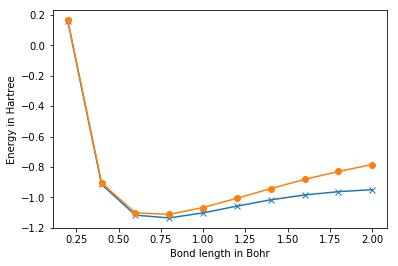

In [9]:
from molecular_data import MolecularData
from run_psi4 import run_psi4

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.2
n_points = 10

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point)
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        autosave=False, description=str(bond_length))
    
    # Run Psi4.
    molecule = run_psi4(molecule,
                        run_scf=run_scf,
                        run_mp2=run_mp2,
                        run_cisd=run_cisd,
                        run_ccsd=run_ccsd,
                        run_fci=run_fci)

    # Print out some results of calculation.
    print('\nAt bond length of {} Bohr, molecular hydrogen has:'.format(
        bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('FCI energy of {} Hartree.'.format(molecule.fci_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in Bohr')
plt.show()

## MolecularOperator for molecular Hamiltonians and RDMs

Molecular Hamiltonians can be expressed as $H = h_0 + \sum_{pq} h_{pq}\, a^\dagger_p a_q + \frac{1}{2} \sum_{pqrs} h_{pqrs} \, a^\dagger_p a^\dagger_q a_r a_s$ where $h_0$ is a constant shift due to the nuclear repulsion and $h_{pq}$ and $h_{pqrs}$ are the famous molecular integrals. Since fermions interact pairwise, their energy is thus a unique function of the one-particle and two-particle reduced density matrices which are expressed in second quantization as $\rho_{pq} = \left \langle p \mid a^\dagger_p a_q \mid q \right \rangle$ and $\rho_{pqrs} = \left \langle pq \mid a^\dagger_p a_q \mid rs \right \rangle$, respectively.

Because both the RDMs and molecular Hamiltonians are both compactly represented and manipulated as 2- and 4- index tensors, we represent them using the same MolecularOperator data structure. The MolecularOperator data structure can be initialized for a Hamiltonian (or RDM) by passing the constant $h_0$ (or 0), as well as numpy arrays representing $h_{pq}$ (or $\rho_{pq}$) and $h_{pqrs}$ (or $\rho_{pqrs}$). Importantly, MolecularOperators can also be obtained by calling MolecularData.get_molecular_hamiltonian(), MolecularData.get_molecular_rdm(), or FermionOperator.get_molecular_operator(). When generating RDMs or Hamiltonians from the MolecularData class, one can also choose to restrict the system to an active space.

The MolecularOperator data structure overloads the slice operator [] so that one can get or set the key attributes of the MolecularOperator: .constant, .one_body_coefficients and .two_body_coefficients. For instance, MolecularOperator[p,q,r,s] would return $h_{pqrs}$ or $\rho_{pqrs}$. It also supports binary operators !=, ==. Importantly, the class supports fast basis transformations using the method MolecularOperator.rotate_basis(rotation_matrix).

But perhaps most importantly, one can map the MolecularOperator to any of the other data structures we've described here. The generation of a QubitOperator representation of the MolecularOperator using the Jordan-Wigner transformation is shown below. Finally, note that more changes are coming to this class that will make it easier to work with.

In [10]:
from molecular_data import MolecularData
from run_psi4 import run_psi4
import scipy
import scipy.linalg
import numpy

# Set molecule parameters.
diatomic_bond_length = 4.
geometry = [('Li', (0., 0., 0.)), ('H', (0., 0., diatomic_bond_length))]
basis = 'sto-3g'
multiplicity = 1
description = str(diatomic_bond_length)

# Set Hamiltonian parameters.
active_space_start = 1
active_space_stop = 3

# Generate and populate instance of MolecularData using Psi4.
molecule = MolecularData(geometry, basis, multiplicity,
                         description=description, autosave=False)
molecule = run_psi4(molecule, run_scf=True)

# Get the Hamiltonian in an active space.
molecular_hamiltonian = molecule.get_molecular_hamiltonian(
    active_space_start, active_space_stop)
print('\nThe associated molecular Hamiltonian follows:\n{}\n'.format(
    molecular_hamiltonian))

# Map operator to fermions and qubits.
fermion_hamiltonian = molecular_hamiltonian.get_fermion_operator()
qubit_hamiltonian = molecular_hamiltonian.jordan_wigner_transform()
print('The associated qubit Hamiltonian follows:\n{}'.format(qubit_hamiltonian))
sparse_hamiltonian = qubit_hamiltonian.get_sparse_operator()
energy, state = sparse_hamiltonian.get_ground_state()
print('Ground state energy before rotation is {} Hartree.'.format(energy))

# Randomly rotate.
n_orbitals = molecular_hamiltonian.n_qubits // 2
n_variables = n_orbitals * (n_orbitals - 1) / 2
random_angles = numpy.pi * (1. - 2. * numpy.random.rand(n_variables))
kappa = numpy.zeros((n_orbitals, n_orbitals))
index = 0
for p in range(n_orbitals):
    for q in range(p + 1, n_orbitals):
        kappa[p, q] = random_angles[index]
        kappa[q, p] = -numpy.conjugate(random_angles[index])
        index += 1

    # Build the unitary rotation matrix.
    difference_matrix = kappa + kappa.transpose()
    assert numpy.amax(numpy.absolute(difference_matrix)) < 1e-9
    rotation_matrix = scipy.linalg.expm(kappa)

    # Apply the unitary.
    molecular_hamiltonian.rotate_basis(rotation_matrix)
qubit_hamiltonian = molecular_hamiltonian.jordan_wigner_transform()
sparse_hamiltonian = qubit_hamiltonian.get_sparse_operator()
energy, state = sparse_hamiltonian.get_ground_state()
print('Ground state energy after rotation is {} Hartree.'.format(energy))


The associated molecular Hamiltonian follows:
[] -7.00307139836

[0 0] -0.49176143122
[0 2] 0.127933719693
[1 1] -0.49176143122
[1 3] 0.127933719693
[2 0] 0.127933719693
[2 2] -0.389242464849
[3 1] 0.127933719693
[3 3] -0.389242464849

[0 1 1 0] 0.180809315862
[0 1 1 2] -0.0639668602239
[0 1 3 0] -0.0639668602239
[0 1 3 2] 0.0771665402713
[0 2 0 2] 0.0771665402713
[0 2 2 0] 0.144507326259
[0 3 1 0] -0.0639668602239
[0 3 1 2] 0.0771665402713
[0 3 3 0] 0.144507326259
[0 3 3 2] -0.0254096944453
[1 0 0 1] 0.180809315862
[1 0 0 3] -0.0639668602239
[1 0 2 1] -0.0639668602239
[1 0 2 3] 0.0771665402713
[1 2 0 1] -0.0639668602239
[1 2 0 3] 0.0771665402713
[1 2 2 1] 0.144507326259
[1 2 2 3] -0.0254096944453
[1 3 1 3] 0.0771665402713
[1 3 3 1] 0.144507326259
[2 0 0 2] 0.144507326259
[2 0 2 0] 0.0771665402713
[2 1 1 0] -0.0639668602239
[2 1 1 2] 0.144507326259
[2 1 3 0] 0.0771665402713
[2 1 3 2] -0.0254096944453
[2 3 1 0] 0.0771665402713
[2 3 1 2] -0.0254096944453
[2 3 3 0] -0.0254096944453
[2 3 